In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [35]:
df = pd.read_csv('/content/hw5_me644.csv')

# (a) Calculate correlation matrix, scatter plots and any other related metrics to qualitatively propose possible hypotheses and create the hypotheses space.

In [36]:
df.head()

theta  theta_dot  theta_double_dot
0  0.040431  -0.069829          0.029322
1 -0.151797  -0.662335          0.138360
2 -0.584669   0.797156          0.446742
3 -0.151016  -0.772319          0.016372
4  0.256469   0.188715         -0.298235

In [37]:

df.shape

(1000, 3)

In [38]:
# Display info about columns and types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   theta             1000 non-null   float64
 1   theta_dot         1000 non-null   float64
 2   theta_double_dot  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [39]:
# Basic statistics
df.describe()

theta    theta_dot  theta_double_dot
count  1000.000000  1000.000000       1000.000000
mean      0.015605    -0.005191         -0.020738
std       0.429684     0.419207          0.416626
min      -1.123710    -1.049432         -1.180565
25%      -0.252360    -0.287320         -0.289527
50%       0.012416    -0.017732         -0.007187
75%       0.288697     0.263175          0.255229
max       1.197184     1.247925          1.158677

In [40]:
df.isnull().sum()


theta               0
theta_dot           0
theta_double_dot    0
dtype: int64

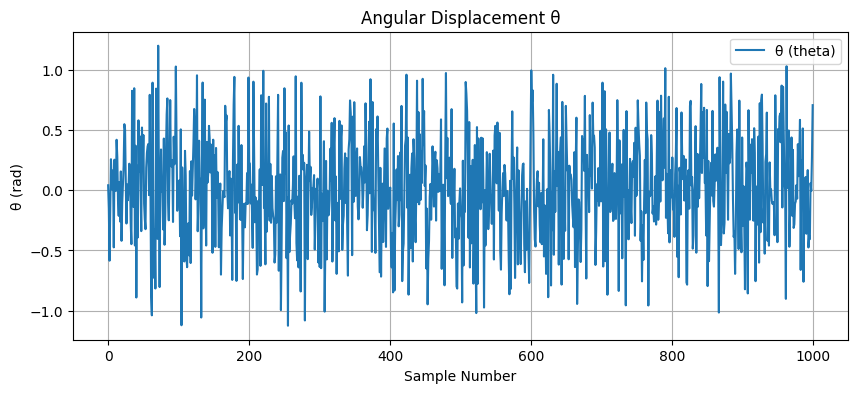

In [41]:
# Plot theta
plt.figure(figsize=(10, 4))
plt.plot(df['theta'], label='θ (theta)')
plt.xlabel('Sample Number')
plt.ylabel('θ (rad)')
plt.title('Angular Displacement θ')
plt.legend()
plt.grid(True)
plt.savefig('Angular Displacement θ', dpi=300)
plt.show()

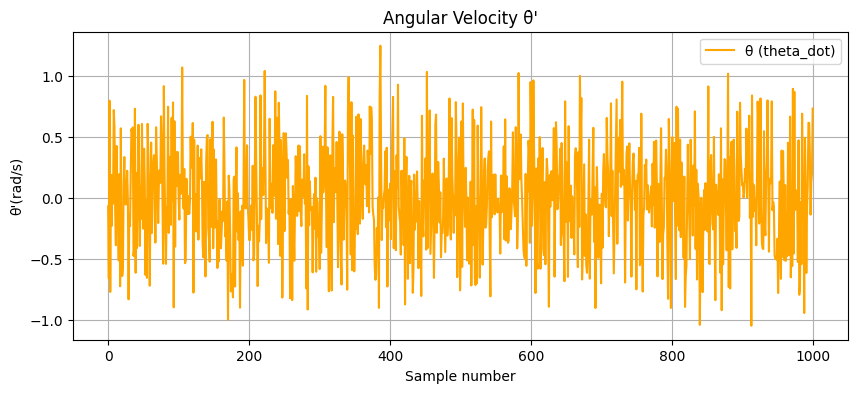

In [42]:
# Plot theta_dot
plt.figure(figsize=(10, 4))
plt.plot(df['theta_dot'], label='θ̇ (theta_dot)', color='orange')
plt.xlabel('Sample number')
plt.ylabel("θ̇'(rad/s)")
plt.title("Angular Velocity θ̇'")
plt.legend()
plt.grid(True)
plt.savefig("Angular Velocity θ̇'", dpi=300)
plt.show()


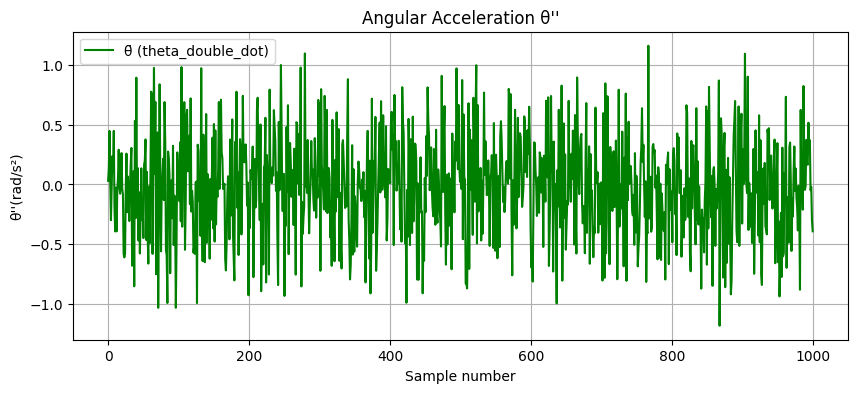

In [43]:
# Plot theta_double_dot
plt.figure(figsize=(10, 4))
plt.plot(df['theta_double_dot'], label='θ̈ (theta_double_dot)', color='green')
plt.xlabel('Sample number')
plt.ylabel("θ''(rad/s²)")
plt.title("Angular Acceleration θ''")
plt.legend()
plt.grid(True)
plt.savefig("Angular Acceleration θ''", dpi=300)
plt.show()

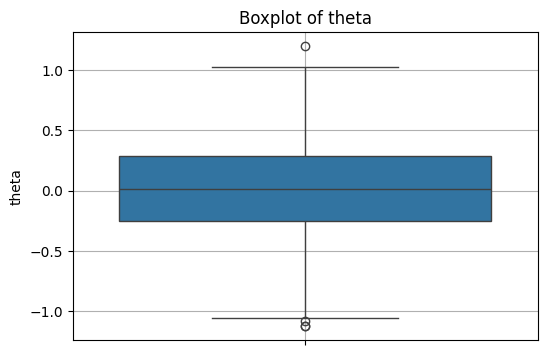

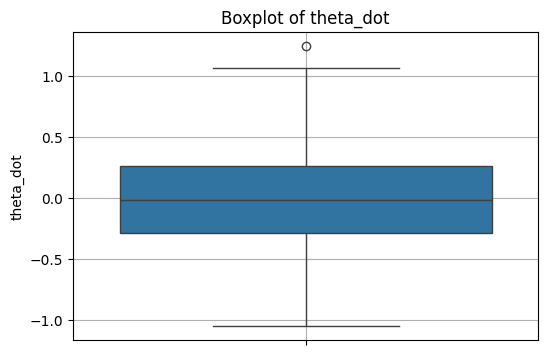

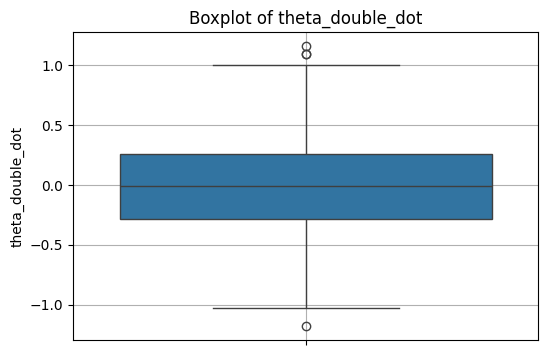

In [44]:
# Boxplot for each column
for col in ['theta', 'theta_dot', 'theta_double_dot']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.savefig(f'Boxplot of {col}', dpi=300)
    plt.show()

In [45]:
# Adding these new columns to the data frame

df['sin_theta'] = np.sin(df['theta'])
df['theta_squared'] = df['theta'] ** 2
df['theta_dot_squared'] = df['theta_dot'] ** 2

In [46]:
print(df.columns)

Index(['theta', 'theta_dot', 'theta_double_dot', 'sin_theta', 'theta_squared',
       'theta_dot_squared'],
      dtype='object')


In [47]:
corr_matrix = df[['theta', 'sin_theta', 'theta_squared', 'theta_dot', 'theta_dot_squared', 'theta_double_dot']].corr()
corr_matrix


theta  sin_theta  theta_squared  theta_dot  \
theta              1.000000   0.998554       0.030648  -0.045452   
sin_theta          0.998554   1.000000       0.029833  -0.046386   
theta_squared      0.030648   0.029833       1.000000   0.009972   
theta_dot         -0.045452  -0.046386       0.009972   1.000000   
theta_dot_squared -0.006074  -0.005369      -0.032064   0.048752   
theta_double_dot  -0.940972  -0.940533      -0.028262   0.061377   

                   theta_dot_squared  theta_double_dot  
theta                      -0.006074         -0.940972  
sin_theta                  -0.005369         -0.940533  
theta_squared              -0.032064         -0.028262  
theta_dot                   0.048752          0.061377  
theta_dot_squared           1.000000         -0.005858  
theta_double_dot           -0.005858          1.000000

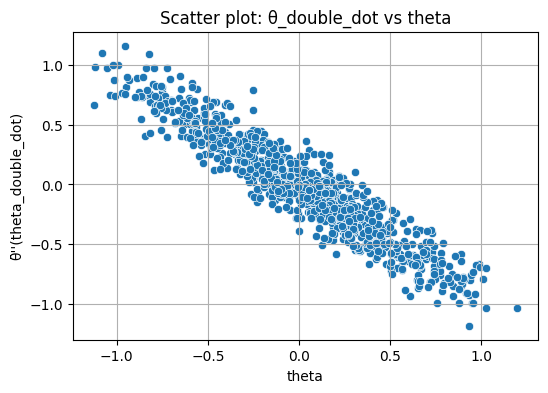

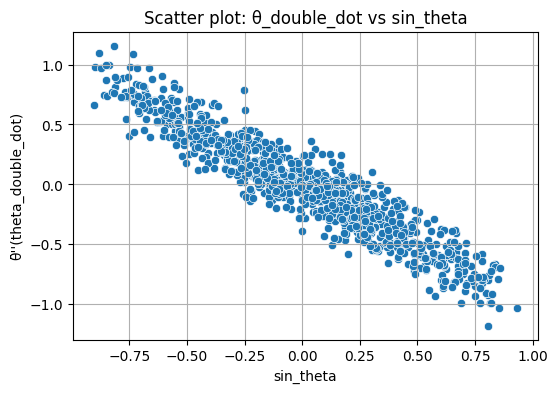

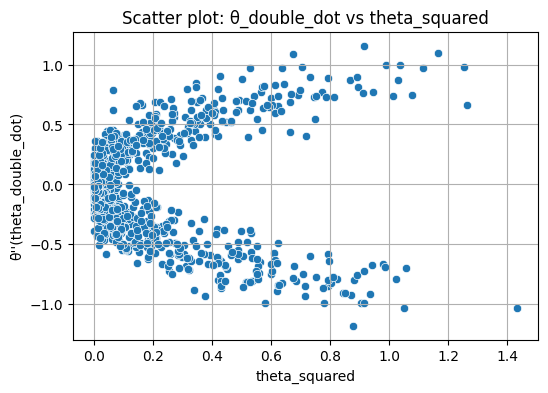

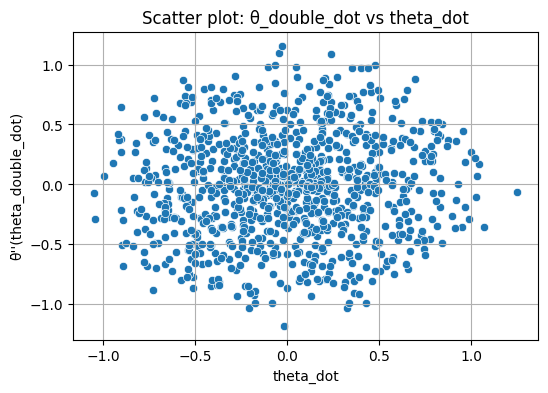

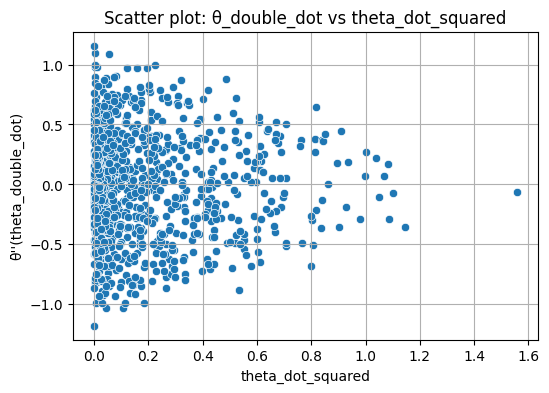

In [48]:
features = ['theta', 'sin_theta', 'theta_squared', 'theta_dot', 'theta_dot_squared']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['theta_double_dot'])
    plt.xlabel(feature)
    plt.ylabel("θ̈''(theta_double_dot)")
    plt.title(f'Scatter plot: θ_double_dot vs {feature}')
    plt.grid(True)
    plt.savefig(f'Scatter plot: θ_double_dot vs {feature}', dpi=300)
    plt.show()

# Hypothesis 1: θ'' =  a * sinθ + b
# Hypothesis 2: θ''= a * sinθ + b * θ'
# Hypothesis 3: θ'' = a * sinθ + b * θ' +  c * θ
# Hypothesis 4: θ'' = a * sinθ + b * θ' + c * (θ')^2
# Hypothesis 5: θ'' = a * sinθ + b * θ' + c * θ + d * (θ)^2 + e * (θ')^2

**"Based on correlation analysis and scatter plots, we propose the following five hypotheses (H1 to H5) as potential governing equations for theta_double_dot
.These hypotheses will be evaluated quantitatively in the next step."**

# (b) Using linear or nonlinear regression with ridge regularization find appropriate parameters.

# Hypothesis 1: θ'' =  a*sinθ + b

In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

X = df[['sin_theta']].values
y = df['theta_double_dot'].values

model1 = Ridge(alpha=0.01)
model1.fit(X, y)

y_pred1 = model1.predict(X)

mse1 = mean_squared_error(y, y_pred1)
r2_1 = r2_score(y, y_pred1)

print("Coefficient (a):", model1.coef_)
print("Intercept:", model1.intercept_)
print("MSE:", mse1)
print("R² score:", r2_1)


Coefficient (a): [-0.99157124]
Intercept: -0.006246341791507234
MSE: 0.020010228446149043
R² score: 0.8846029516660224


# Hypothesis 2: θ''= a * sinθ + b * θ'

In [50]:
X = df[['sin_theta', 'theta_dot']].values
y = df['theta_double_dot'].values

model2 = Ridge(alpha=0.01)
model2.fit(X, y)

y_pred2 = model2.predict(X)

mse2 = mean_squared_error(y, y_pred2)
r2_2 = r2_score(y, y_pred2)

print("Coefficients:", model2.coef_)
print("Intercept:", model2.intercept_)
print("MSE:", mse2)
print("R² score:", r2_2)


Coefficients: [-0.99070126  0.01767999]
Intercept: -0.0061672832353177175
MSE: 0.019955480963887006
R² score: 0.8849186750908578


# Hypothesis 3: θ'' = a * sinθ + b * θ' +  c * θ

In [51]:
X = df[['sin_theta', 'theta_dot', 'theta']].values
y = df['theta_double_dot'].values

model3 = Ridge(alpha=0.01)
model3.fit(X, y)

y_pred3 = model3.predict(X)

mse3 = mean_squared_error(y, y_pred3)
r2_3 = r2_score(y, y_pred3)

print("Coefficients:", model3.coef_)
print("Intercept:", model3.intercept_)
print("MSE:", mse3)
print("R² score:", r2_3)

Coefficients: [-0.33463423  0.01821638 -0.60423567]
Intercept: -0.0063240558630694044
MSE: 0.019758070911241137
R² score: 0.8860571197342108


# Hypothesis 4: θ'' = a * sinθ + b * θ' + c * (θ')^2

In [52]:
X = df[['sin_theta', 'theta_dot', 'theta_dot_squared']].values
y = df['theta_double_dot'].values

model4 = Ridge(alpha=0.01)
model4.fit(X, y)

y_pred4 = model4.predict(X)

mse4 = mean_squared_error(y, y_pred4)
r2_4 = r2_score(y, y_pred4)

print("Coefficients:", model4.coef_)
print("Intercept:", model4.intercept_)
print("MSE:", mse4)
print("R² score:", r2_4)


Coefficients: [-0.99074     0.01824984 -0.02182189]
Intercept: -0.0023321445269365616
MSE: 0.019931396276512723
R² score: 0.88505756914899


# Hypothesis 5: θ'' = a * sinθ + b * θ' + c * θ + d * (θ)^2 + e * (θ')^2

In [53]:
X = df[['sin_theta', 'theta_dot', 'theta', 'theta_squared', 'theta_dot_squared']].values
y = df['theta_double_dot'].values

model5 = Ridge(alpha=0.01)
model5.fit(X, y)

y_pred5 = model5.predict(X)

mse5 = mean_squared_error(y, y_pred5)
r2_5 = r2_score(y, y_pred5)

print("Coefficients:", model5.coef_)
print("Intercept:", model5.intercept_)
print("MSE:", mse5)
print("R² score:", r2_5)


Coefficients: [-3.31503245e-01  1.88152027e-02 -6.07148375e-01 -4.66260756e-04
 -2.27140841e-02]
Intercept: -0.0022468711510514536
MSE: 0.019731992480378047
R² score: 0.8862075115178369


In [54]:
print('H1 result:' , mse1,r2_1)
print('H2 result:' , mse2,r2_2)
print('H3 result:' , mse3,r2_3)
print('H4 result:' , mse4,r2_4)
print('H5 result:' , mse5,r2_5)

H1 result: 0.020010228446149043 0.8846029516660224
H2 result: 0.019955480963887006 0.8849186750908578
H3 result: 0.019758070911241137 0.8860571197342108
H4 result: 0.019931396276512723 0.88505756914899
H5 result: 0.019731992480378047 0.8862075115178369


In [55]:

# Create a dictionary
results = {
    'Hypothesis': ['H1', 'H2', 'H3', 'H4', 'H5'],
    'MSE': [mse1, mse2, mse3 , mse4 , mse5],
    'R2': [r2_1 , r2_2 , r2_3 , r2_4 , r2_5 ]
}

# Convert to DataFrame
df_results = pd.DataFrame(results)
print(df_results)


  Hypothesis       MSE        R2
0         H1  0.020010  0.884603
1         H2  0.019955  0.884919
2         H3  0.019758  0.886057
3         H4  0.019931  0.885058
4         H5  0.019732  0.886208


/tmp/ipython-input-56-1531444026.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hypothesis', y='MSE', data=df_results, palette='viridis')


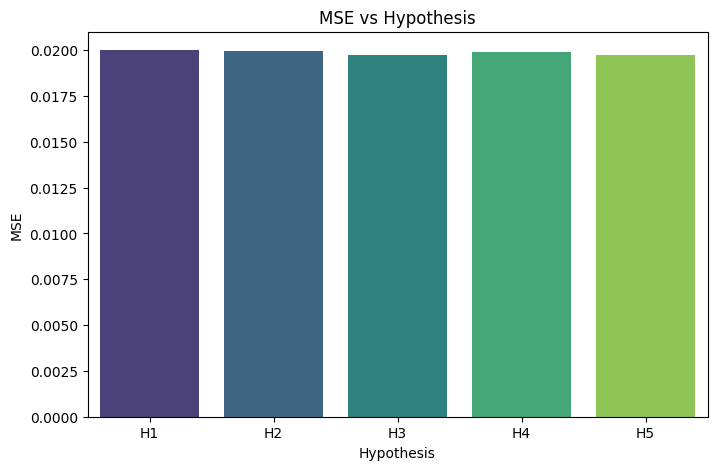

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Hypothesis', y='MSE', data=df_results, palette='viridis')
plt.title('MSE vs Hypothesis')
plt.savefig('MSE vs Hypothesis', dpi=300)


/tmp/ipython-input-57-3476297885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hypothesis', y='R2', data=df_results, palette='magma')


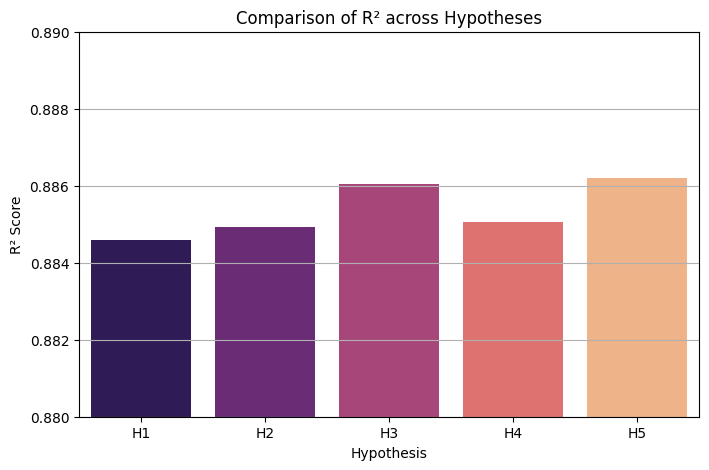

In [57]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Hypothesis', y='R2', data=df_results, palette='magma')
plt.title('Comparison of R² across Hypotheses')
plt.ylabel('R² Score')
plt.xlabel('Hypothesis')
plt.ylim([0.88, 0.89])  # zoom in since R² values are close
plt.grid(True, axis='y')
plt.savefig('r2 vs Hypothesis', dpi=300)
plt.show()


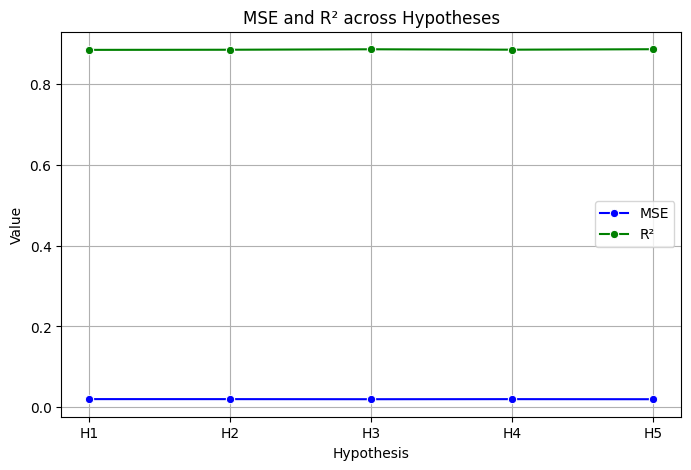

In [58]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Hypothesis', y='MSE', data=df_results, marker='o', label='MSE', color='blue')
sns.lineplot(x='Hypothesis', y='R2', data=df_results, marker='o', label='R²', color='green')
plt.title('MSE and R² across Hypotheses')
plt.ylabel('Value')
plt.xlabel('Hypothesis')
plt.grid(True)
plt.legend()
plt.savefig('mse and r2 across Hypothesis', dpi=300)
plt.show()


# Trying out lasso regression

In [59]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# H3 features
X3 = df[['sin_theta', 'theta_dot', 'theta']].values
y = df['theta_double_dot'].values

# Lasso regression
lasso3 = Lasso(alpha=0.001)
lasso3.fit(X3, y)

# Predict
y_pred3 = lasso3.predict(X3)

# Evaluate
mse3 = mean_squared_error(y, y_pred3)
r2_3 = r2_score(y, y_pred3)

print("=== Lasso H3: θ̈ = a·sinθ + b·θ̇ + c·θ ===")
print("Coefficients:", lasso3.coef_)
print("Intercept:", lasso3.intercept_)
print("MSE:", mse3)
print("R² score:", r2_3)


=== Lasso H3: θ̈ = a·sinθ + b·θ̇ + c·θ ===
Coefficients: [-0.19685083  0.01289702 -0.72561104]
Intercept: -0.006471357058354207
MSE: 0.01977664002472268
R² score: 0.8859500334562247


In [60]:
# H5 features
X5 = df[['sin_theta', 'theta_dot', 'theta', 'theta_squared', 'theta_dot_squared']].values

# Lasso regression
lasso5 = Lasso(alpha=0.001)
lasso5.fit(X5, y)

# Predict
y_pred5 = lasso5.predict(X5)

# Evaluate
mse5 = mean_squared_error(y, y_pred5)
r2_5 = r2_score(y, y_pred5)

print("\n=== Lasso H5: θ̈ = a·sinθ + b·θ̇ + c·θ + d·θ² + e·θ̇² ===")
print("Coefficients:", lasso5.coef_)
print("Intercept:", lasso5.intercept_)
print("MSE:", mse5)
print("R² score:", r2_5)



=== Lasso H5: θ̈ = a·sinθ + b·θ̇ + c·θ + d·θ² + e·θ̇² ===
Coefficients: [-0.19651632  0.01296371 -0.72592336  0.         -0.00254292]
Intercept: -0.006024525049219959
MSE: 0.01977112447137522
R² score: 0.8859818411178882


In [61]:
print('H3 result lasso:' , mse3,r2_3)
print('H5 result lasso:' , mse5,r2_5)

H3 result lasso: 0.01977664002472268 0.8859500334562247
H5 result lasso: 0.01977112447137522 0.8859818411178882


# (c) Use cross validation to finalize your hypothesis.

In [62]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Target
y = df['theta_double_dot'].values

# H3 features
X3 = df[['sin_theta', 'theta_dot', 'theta']].values

# H5 features
X5 = df[['sin_theta', 'theta_dot', 'theta', 'theta_squared', 'theta_dot_squared']].values


In [63]:
ridge_model = Ridge(alpha=1.0)


# for H3

In [64]:
scores3 = cross_val_score(ridge_model, X3, y, cv=5, scoring='r2')
print("H3 cross-validated R² scores:", scores3)
print("H3 mean R²:", np.mean(scores3))


H3 cross-validated R² scores: [0.88451384 0.88308675 0.89121054 0.88908478 0.87492896]
H3 mean R²: 0.8845649744044906


# for H5

In [65]:
scores5 = cross_val_score(ridge_model, X5, y, cv=5, scoring='r2')
print("H5 cross-validated R² scores:", scores5)
print("H5 mean R²:", np.mean(scores5))


H5 cross-validated R² scores: [0.8836965  0.88297377 0.89109302 0.88892037 0.87494959]
H5 mean R²: 0.8843266504175116


# Conclusion

"Based on cross-validation performance and model simplicity, we conclude that Hypothesis 3 (H3) provides the best trade-off between prediction accuracy and model complexity, and is therefore selected as the final model."